
<table>
<tr>
<td width=15%><img src="./img/UGA.png"></img></td>
<td><center><h1>Introduction to Python for Data Sciences</h1></center></td>
<td width=15%><a href="http://www.iutzeler.org" style="font-size: 16px; font-weight: bold">Franck Iutzeler</a> </td>
</tr>
</table>



<br/><br/>

<center><a style="font-size: 40pt; font-weight: bold">Chap. 4 - Scikit Learn </a></center> 

<br/><br/>

# 2- Supervised Learning

In the session, we will investigate some *examples* on how to deal with popular learning problems using standard algorithms. Many other problems and algorithms exist so this course is not at all exhaustive. 


## Classification


[[  6.37734541 -10.61510727]
 [  6.50072722  -3.82403586]
 [  4.29225906  -8.99220442]
 [  7.39169472  -3.1266933 ]
 [  7.64306311 -10.02356892]] [1 0 1 0 1]


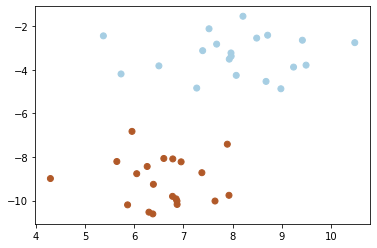

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

# we create 40 separable points in R^2 around 2 centers (random_state=6 is a seed so that the set is separable)
X, y = make_blobs(n_samples=40, n_features=2, centers=2 , random_state=6)

print(X[:5,:],y[:5]) # print the first 5 points and labels

plt.scatter(X[:, 0], X[:, 1], c=y,  cmap=plt.cm.Paired)

Support Vector Machines (SVM) are based on learning a vector $w$ and an intercept $b$ such that the hyperplane $w^T x - b = 0$ separates the data i.e.  $a$ belongs to one class if  $w^T a - b > 0$ and the other elsewhere. 


They were later extended to *Kernel methods* that is  $\kappa(w, a) - b = 0$ is now the separating *curve* where $\kappa$ is the *kernel*, typically:
* linear: $\kappa(x,y)= x^T y$ (original SVM) 
* polynomial: $\kappa(x,y)= (x^T y)^d$ 
* Gaussian radial basis function (rfb):   $\kappa(x,y)= \exp( - \gamma \| x - y \|^2 )$

In [2]:
from sklearn.svm import SVC # Support vector classifier i.e. Classifier by SVM

modelSVMLinear = SVC(kernel="linear")
modelSVMLinear.fit(X,y)

SVC(kernel='linear')

The following illustration can be found in the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas.

In [3]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

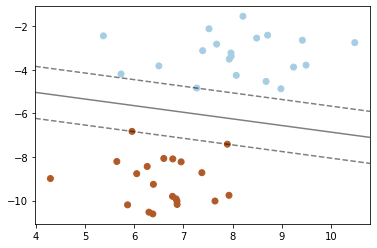

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y ,  cmap=plt.cm.Paired)
plot_svc_decision_function(modelSVMLinear)

We see clearly that the linear SVM seeks at maximizing the *margin* between the hyperplane and the two well defined classes from the data.

### Non-separable data

In real cases, the data is usually not linearly separable as before.

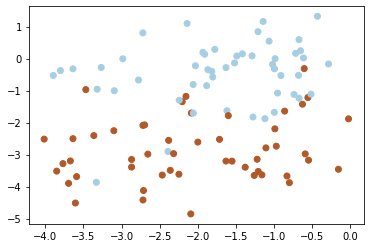

In [5]:
# we create points in R^2 around 2 centers (random_state=48443 is a seed so that the set is *not* separable)
X, y = make_blobs(n_samples=100, n_features=2, centers=2 , random_state=48443)

plt.scatter(X[:, 0], X[:, 1], c=y,  cmap=plt.cm.Paired)

Let us use the *same* linear SVM classifier. Obviously, there are *misclassified points*, the model is thus learnt not by maximizing the margin (which does not exist anymore) but by minimizing a penalty over misclassified data. This penalty takes the form of an allowance margin controlled by a parameter $C$. The smaller $C$ the more inclusive the margin. Finding a good value for $C$ is up to the data scientist.

In [6]:
from sklearn.model_selection import train_test_split    # sklearn > ...

    
XTrain, XTest, yTrain, yTest = train_test_split(X,y,test_size = 0.5) # split data in two

model1 = SVC(kernel="linear",C=0.01)
model1.fit(XTrain,yTrain)

model2 = SVC(kernel="linear",C=100)
model2.fit(XTrain,yTrain)

SVC(C=100, kernel='linear')

Text(0.5, 1.0, 'C = 0.01')

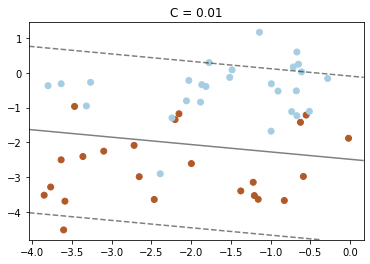

In [7]:
plt.scatter(XTrain[:, 0], XTrain[:, 1], c=yTrain ,  cmap=plt.cm.Paired)
plot_svc_decision_function(model1)
plt.title("C = 0.01")

Text(0.5, 1.0, 'C = 100')

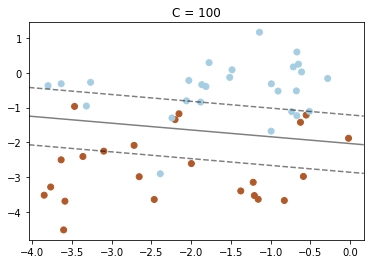

In [8]:
plt.scatter(XTrain[:, 0], XTrain[:, 1], c=yTrain ,  cmap=plt.cm.Paired)
plot_svc_decision_function(model2)
plt.title("C = 100")

To find out which value of $C$ to use or globally the performance of the classifier, one can use Scikit Learn's [classification metrics](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics), for instance the confusion matrix.

In [9]:
from sklearn.metrics import confusion_matrix


yFit1 = model1.predict(XTest)
yFit2 = model2.predict(XTest)


mat1 = confusion_matrix(yTest, yFit1)
mat2 = confusion_matrix(yTest, yFit2)

print('Model with C = 0.01')
print(mat1)
print("Model with C = 100")
print(mat2)

Model with C = 0.01
[[22  1]
 [ 5 22]]
Model with C = 100
[[19  4]
 [ 2 25]]


It can also be plotted in a fancier way with seaborn.

Text(0.5, 15.0, 'predicted label')

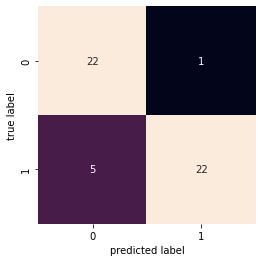

In [10]:
import seaborn as sns

sns.heatmap(mat1, square=True, annot=True ,cbar=False)
plt.ylabel('true label')
plt.xlabel('predicted label')

### Kernels

When the separation between classes is not *linear*, kernels may be used to draw separating curves instead of lines. The most popular is the Gaussian rbf.

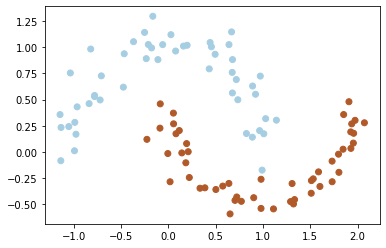

In [11]:
from sklearn.datasets import make_moons

X,y = make_moons(noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y,  cmap=plt.cm.Paired)

In [12]:
modelLinear = SVC(kernel="linear")
modelLinear.fit(X,y)

modelRbf = SVC(kernel="rbf")
modelRbf.fit(X,y)

SVC()

Text(0.5, 1.0, 'The two models superposed')

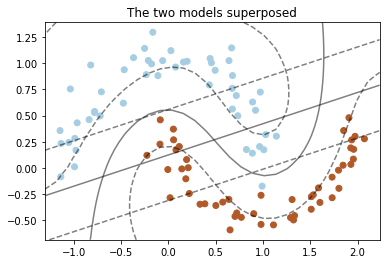

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y,  cmap=plt.cm.Paired)
plot_svc_decision_function(modelLinear)
plot_svc_decision_function(modelRbf)
plt.title("The two models superposed")

Let us compare the linear and rbf training error using the zero one loss (the proportion of misclassified examples).

In [14]:
from sklearn.metrics import zero_one_loss

yFitLinear = modelLinear.predict(X)
yFitRbf = modelRbf.predict(X)

print("0/1 loss -- Linear: {:.3f}      Rbf: {:.3f}".format(zero_one_loss(y, yFitLinear),zero_one_loss(y, yFitRbf)))

0/1 loss -- Linear: 0.140      Rbf: 0.010


### Multiple classes 


Where there are multiples classes (as in the *iris* dataset of the Pandas notebook), different strategies can be adopted:
* Transforming the multiclass problem into a binary one by looking at the *one-vs-rest* problem (for each class construct a binary classifier between it and the rest) or the *one-vs-one* one (where each couple of classes is considered separately). After this transformation, standard binary classifiers can be used.
* Using dedicated algorithms such as *decision trees* 

The corresponding algorithms can be found in the [multiclass module documentation](http://scikit-learn.org/stable/modules/multiclass.html).

We are going to illustrate this by the iris 3-class classification problem using only the 2 petal features (width and length, this is only so that the feature vector is 2D and easy to visualize). 

In [15]:
import pandas as pd
import numpy as np

iris = pd.read_csv('data/iris.csv')
classes = pd.DataFrame(iris["species"])
features = iris.drop(["species","sepal_length","sepal_width"],axis=1)

In [16]:
classes.sample(6)

,species
28,setosa
126,virginica
108,virginica
75,versicolor
10,setosa
3,setosa


In [17]:
features.sample(6)

,petal_length,petal_width
12,1.4,0.1
136,5.6,2.4
28,1.4,0.2
14,1.2,0.2
137,5.5,1.8
140,5.6,2.4


In [18]:
XTrain, XTest, yTrain, yTest = train_test_split(features,classes,test_size = 0.5)

In [19]:
from sklearn.multiclass import OneVsRestClassifier

yPred = OneVsRestClassifier(SVC()).fit(XTrain, yTrain).predict(XTest)

In [20]:
print(yPred)  # Note the classes are not number but everything went as expected

['setosa' 'versicolor' 'virginica' 'virginica' 'versicolor' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'virginica'
 'versicolor' 'setosa' 'versicolor' 'setosa' 'setosa' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'versicolor' 'virginica' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'virginica' 'virginica' 'virginica'
 'versicolor' 'setosa' 'versicolor' 'virginica' 'setosa' 'setosa' 'setosa'
 'virginica' 'virginica' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'versicolor' 'setosa' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'versicolor' 'setosa' 'versicolor' 'virginica' 'setosa' 'setosa' 'setosa'
 'versicolor']


Text(0.5, 15.0, 'predicted label')

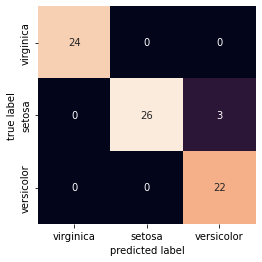

In [21]:
class_labels= ['virginica' , 'setosa' , 'versicolor']
sns.heatmap(confusion_matrix(yTest, yPred), square=True, annot=True ,cbar=False,  xticklabels= class_labels,  yticklabels=class_labels)
plt.ylabel('true label')
plt.xlabel('predicted label')

### Other classifiers 


The main classifiers from Scikit learn are:  *Linear SVM, RBF SVM (as already seen), Nearest Neighbors, Gaussian Process, Decision Tree, Random Forest, Neural Net, AdaBoost, Naive Bayes, QDA*.

Use is:
    
    from sklearn.neural_network import MLPClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC
    from sklearn.gaussian_process import GaussianProcessClassifier
    from sklearn.gaussian_process.kernels import RBF
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


    classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

##   Regression

Let consider the problem of predicting real values from a set of features.

We will consider the <a href="http://archive.ics.uci.edu/ml/datasets/Student+Performance">student performance</a> dataset. The goal is to predict the final grade from the other information, we get from the documentation:

In [22]:
import pandas as pd
import numpy as np

student = pd.read_csv('data/student-mat.csv')
student.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,2,2,0,...,4,3,4,1,1,3,6,5,6,6
1,F,17,U,GT3,T,1,1,1,2,0,...,5,3,3,1,1,3,4,5,5,6
2,F,15,U,LE3,T,1,1,1,2,3,...,4,3,2,2,3,3,10,7,8,10
3,F,15,U,GT3,T,4,2,1,3,0,...,3,2,2,1,1,5,2,15,14,15
4,F,16,U,GT3,T,3,3,1,2,0,...,4,3,2,1,2,5,4,6,10,10


In [23]:
target = pd.DataFrame(student["G3"])
features = student.drop(["G3"],axis=1)

One immediate problem here is that the features are not *numeric* (not floats). Thankfully, Scikit Learn provides [encoders](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder) to convert categorical (aka nominal, discrete) features to numerical ones.

In [24]:
from sklearn.preprocessing import LabelEncoder

lenc = LabelEncoder()
num_features = features.apply(lenc.fit_transform)

In [25]:
num_features.head() 

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,3,1,0,0,4,4,1,1,0,...,0,3,2,3,0,0,2,6,2,3
1,0,2,1,0,1,1,1,0,1,0,...,0,4,2,2,0,0,2,4,2,2
2,0,0,1,1,1,1,1,0,1,3,...,0,3,2,1,1,2,2,10,4,5
3,0,0,1,0,1,4,2,0,2,0,...,1,2,1,1,0,0,4,2,12,11
4,0,1,1,0,1,3,3,0,1,0,...,0,3,2,1,0,1,4,4,3,7


Even numerical values were encoded, as we are going to normalize, it is not really important. 

The normalization is done by removing the mean and equalizing the variance per feature, in addition, we are going to add an intercept.

In [26]:
from sklearn.preprocessing import StandardScaler, add_dummy_feature

scaler = StandardScaler()
normFeatures = add_dummy_feature(scaler.fit_transform(num_features))

In [27]:
preproData = pd.DataFrame(normFeatures , columns=[ "intercept" ] + list(num_features.columns) )

In [28]:
preproData.describe().T

,count,mean,std,min,25%,50%,75%,max
intercept,395.0,1.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
sex,395.0,-7.195369e-17,1.001268,-0.948176,-0.948176,-0.948176,1.054656,1.054656
age,395.0,1.439074e-16,1.001268,-1.330954,-0.546287,0.238380,1.023046,4.161713
address,395.0,-1.618958e-16,1.001268,-1.867789,0.535392,0.535392,0.535392,0.535392
famsize,395.0,6.295948e-17,1.001268,-0.636941,-0.636941,-0.636941,1.570004,1.570004
Pstatus,395.0,-1.349132e-17,1.001268,-2.938392,0.340322,0.340322,0.340322,0.340322
Medu,395.0,5.396527e-17,1.001268,-2.514630,-0.685387,0.229234,1.143856,1.143856
Fedu,395.0,-1.439074e-16,1.001268,-2.320084,-0.479857,-0.479857,0.440257,1.360371
traveltime,395.0,3.597685e-17,1.001268,-0.643249,-0.643249,-0.643249,0.792251,3.663251
studytime,395.0,4.946817e-17,1.001268,-1.235351,-1.235351,-0.042286,-0.042286,2.343844


### Regression and Feature selection with the Lasso

The lasso problem is finding a regressor $w$ such that minimizes
$$  \frac{1}{2 n_{samples}} \|X w - y ||^2_2 + \alpha \|w\|_1 $$

and is popular for prediction as it simultaneously *selects features* thanks to the $\ell_1$-term. The greater $\alpha$ the fewer features.

In [29]:
from sklearn.model_selection import train_test_split    # sklearn > ...
    
from sklearn.linear_model import Lasso

XTrain, XTest, yTrain, yTest = train_test_split(preproData,target,test_size = 0.25)

model = Lasso(alpha=0.1)
model.fit(XTrain,yTrain)

Lasso(alpha=0.1)

We can observe the regressor $w$ provided by the model, notice the sparsity.

In [30]:
model.coef_

array([ 0.        ,  0.        , -0.09711407, -0.        ,  0.        ,
       -0.        , -0.        , -0.03066885,  0.03753478, -0.        ,
       -0.09019975,  0.15778695, -0.        ,  0.        , -0.04360145,
       -0.        ,  0.        , -0.013165  , -0.09024476,  0.15758927,
        0.0656165 , -0.        , -0.        ,  0.05151306,  0.02957584,
        0.42631872,  0.        ,  4.06258498])

We can observe which coefficients are put to $0$ and which ones are positively/negatively correlated.

In [31]:
print("Value      Feature")
for idx,val in enumerate(model.coef_):
    print("{:6.3f}      {}".format(val,preproData.columns[idx]))

Value      Feature
 0.000      intercept
 0.000      sex
-0.097      age
-0.000      address
 0.000      famsize
-0.000      Pstatus
-0.000      Medu
-0.031      Fedu
 0.038      traveltime
-0.000      studytime
-0.090      failures
 0.158      schoolsup
-0.000      famsup
 0.000      paid
-0.044      activities
-0.000      nursery
 0.000      higher
-0.013      internet
-0.090      romantic
 0.158      famrel
 0.066      freetime
-0.000      goout
-0.000      Dalc
 0.052      Walc
 0.030      health
 0.426      absences
 0.000      G1
 4.063      G2


Let us take a look at our predictions.

In [32]:
targetPred = model.predict(XTest)

print("Predicted    True")
for idx,val in enumerate(targetPred):
    print("{:4.1f}          {:.0f}".format(val,float(yTest.iloc[idx])))

Predicted    True
 9.5          9
13.8          14
13.8          15
 7.9          8
12.0          11
 9.1          10
13.1          15
20.2          19
15.3          17
10.5          11
 6.7          7
18.5          18
10.3          10
14.6          15
 7.4          0
 5.5          8
10.4          11
 9.1          9
 6.6          9
10.3          11
11.3          13
 8.5          9
 1.0          0
 5.7          8
14.8          15
12.7          11
 9.2          10
 5.7          8
12.5          13
14.0          11
15.5          15
18.5          18
14.0          15
 7.0          10
11.6          11
12.9          14
 3.0          0
 5.7          7
 8.5          10
12.6          14
16.0          16
 9.0          10
14.3          16
13.5          14
 7.9          9
 7.4          8
18.6          18
16.1          17
10.0          11
 9.1          11
 3.5          5
 7.8          9
11.5          11
11.4          12
 4.4          5
17.2          18
15.1          15
 5.2          6
 9.2          1

### Regularization path

Selecting a good parameter $\alpha$ is the role of the data scientist. For instance, a easy way to do is the following. 

In [33]:
n_test = 15
alpha_tab = np.logspace(-10,1,base=2,num = n_test)
print(alpha_tab)

[9.76562500e-04 1.68354067e-03 2.90233260e-03 5.00346363e-03
 8.62569933e-03 1.48702368e-02 2.56354799e-02 4.41941738e-02
 7.61883534e-02 1.31344580e-01 2.26430916e-01 3.90354591e-01
 6.72950096e-01 1.16012939e+00 2.00000000e+00]


In [34]:
trainError = np.zeros(n_test)
testError = np.zeros(n_test)
featureNum = np.zeros(n_test)

for idx,alpha in enumerate(alpha_tab):
    model = Lasso(alpha=alpha)
    model.fit(XTrain,yTrain)
    yPredTrain = model.predict(XTrain)
    yPredTest = model.predict(XTest)
    
    trainError[idx] = np.linalg.norm(yPredTrain-yTrain["G3"].values)/yTrain.count()
    testError[idx] = np.linalg.norm(yPredTest-yTest["G3"].values)/yTest.count()
    featureNum[idx] = sum(model.coef_!=0)

    
alpha_opt = alpha_tab[np.argmin(testError)]


Text(0.5, 0, 'alpha')

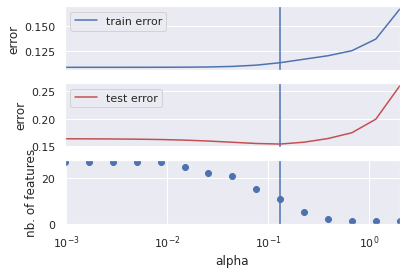

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline


plt.subplot(311)
plt.xscale("log")
plt.plot(alpha_tab, trainError,label="train error")
plt.xlim([min(alpha_tab),max(alpha_tab)])
plt.legend()
plt.xticks([])
plt.axvline(x=alpha_opt)
plt.ylabel("error")

plt.subplot(312)
plt.xscale("log")
plt.plot(alpha_tab, testError,'r',label="test error")
plt.xlim([min(alpha_tab),max(alpha_tab)])
#plt.ylim([0.19, 0.21])
plt.legend()
plt.axvline(x=alpha_opt)
plt.xticks([])
plt.ylabel("error")

plt.subplot(313)
plt.xscale("log")
plt.scatter(alpha_tab, featureNum)
plt.xlim([min(alpha_tab),max(alpha_tab)])
plt.ylim([0,28])
plt.axvline(x=alpha_opt)
plt.ylabel("nb. of features")
plt.xlabel("alpha")



##  Exercises



> **Exercise:** a very popular binary classification exercise is the [survival prediction from Titanic shipwreck on Kaggle](https://www.kaggle.com/c/titanic)
>
> *The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.*
>
> *One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.*
>
> *In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.*
>
>
> The data, taken from [Kaggle](https://www.kaggle.com/c/titanic) is located in `data/titanic/train.csv` and has the following form:

<table>
<tbody>
<tr><th><b>Feature</b></th><th><b>Definition</b></th><th><b>Comment</b></th></tr>
<tr>
<td>PassengerId</td>
<td>ID</td>
<td>numeric</td>
</tr>
<tr>
<td>Survival</td>
<td>Survival of the passenger</td>
<td>0 = No, 1 = Yes <b>target to predict</b></td>
</tr>
<tr>
<td>Pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>Name</td>
<td>Full name w/ Mr. Mrs. etc.</td>
<td>string</td>
</tr>
<tr>
<td>Sex</td>
<td>Sex</td>
<td><tt>male</tt> or <tt>female</tt></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td>numeric</td>
</tr>
<tr>
<td>SibSp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td>numeric</td>
</tr>
<tr>
<td>Parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>Ticket</td>
<td>Ticket number</td>
<td>quite messy</td>
</tr>
<tr>
<td>Fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td>letter + number (e.g. C85), often missing</td>
</tr>
<tr>
<td>Embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

> * Load the dataset and preprocess the features. (you can remove features that seem uninteresting to you).
> * Perform binary classification to predict the survival of a passenger depending on its information.
> * Validate you method on the test set  `data/titanic/test.csv`
> * Perform some feature engineering to improve the performance of you classifier (see e.g. https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/).


> **Exercise:** [House price prediction in Ames, Iowa on Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
>
> The data, taken from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques), is located in `data/house_prices/train.csv`.
>
> * Try to reach the best accurracy in terms of mean absolute error on the log of the prices:
$$Error = \frac{1}{n} \sum_{i=1}^n | \log(predicted_i) - \log(true_i) |$$
> on the test set `data/house_prices/test.csv`.
> * Which features (original or made up) are the most relevant? (see `data/house_prices/data_description.txt`)